# Forward Euler Method Example

Here we'll look at a simple implementation of the forward Euler method applied to a 1-dimensional function in order to see some if its properties. Our example will be the initial value problem defined as:

$$ f^\prime(t) = -0.1f(t), \quad f(0) = 10 $$

Of course, we can integrate this function to see that the solution is

$$ f(t) = 10e^{-0.1t} $$

We'll use this to compare the numerical solutions from the Euler method with the exact solution at $t=50$. The forward Euler method is:

$$ f(t + \Delta t) = f(t) + f^\prime(t)\,\Delta t $$

In [31]:
import numpy as np
from matplotlib import pyplot as plt

#f' = -0.1*f
def euler_step(f,dt):
    return f - 0.1*f*dt

##play with the step size number, observe how f changes
dt = 1
tf = 50.

f0 = 10.
t = 0.

#put first value in array
f = [f0]
tv = [t]

while t + dt <= tf:
    f.append(euler_step(f[-1],dt))
    t += dt
    tv.append(t)

f

[10.0,
 9.0,
 8.1,
 7.289999999999999,
 6.560999999999999,
 5.9049,
 5.31441,
 4.782969,
 4.3046720999999994,
 3.8742048899999997,
 3.4867844009999995,
 3.1381059608999995,
 2.8242953648099993,
 2.541865828328999,
 2.2876792454960992,
 2.058911320946489,
 1.8530201888518403,
 1.6677181699666561,
 1.5009463529699905,
 1.3508517176729913,
 1.215766545905692,
 1.094189891315123,
 0.9847709021836106,
 0.8862938119652496,
 0.7976644307687246,
 0.7178979876918521,
 0.6461081889226669,
 0.5814973700304001,
 0.5233476330273601,
 0.4710128697246241,
 0.4239115827521617,
 0.3815204244769455,
 0.34336838202925096,
 0.30903154382632586,
 0.2781283894436933,
 0.25031555049932397,
 0.22528399544939157,
 0.2027555959044524,
 0.18248003631400717,
 0.16423203268260644,
 0.1478088294143458,
 0.13302794647291122,
 0.1197251518256201,
 0.10775263664305809,
 0.09697737297875228,
 0.08727963568087704,
 0.07855167211278934,
 0.0706965049015104,
 0.06362685441135936,
 0.05726416897022342,
 0.05153775207320107

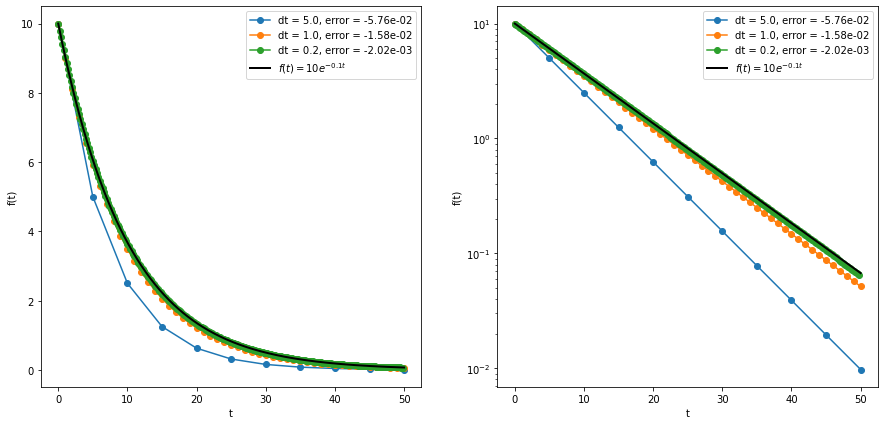

In [64]:
#plot the exact solution and the computed one

tt = np.linspace(0,50,1000)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))

for ax in [ax1,ax2]:
    for dt in [5,1,0.2]:
        f0 = 10.
        t = 0.

        #put first value in array
        f = [f0]
        tv = [t]

        while t + dt <= tf:
            f.append(euler_step(f[-1],dt))
            t += dt
            tv.append(t)

        error = f[-1] - 10*np.exp(-0.1*50)
        ax.plot(tv,f,label=f'dt = {dt:.1f}, error = {error:.2e}',marker='o')

    ax.plot(tt,10*np.exp(-0.1*tt),'k-',lw=2,label=r'$f(t) = 10e^{-0.1t}$')
    ax.set_ylabel('f(t)')
    ax.set_xlabel('t')
    ax.legend()
ax2.set_yscale('log')
fig.savefig('euler.png',bbox_inches='tight',transparent=True)

When the step size is too large, sometimes there can be catastrophic error. Consider this example, where

$$ f^\prime(t) = -f(t) $$

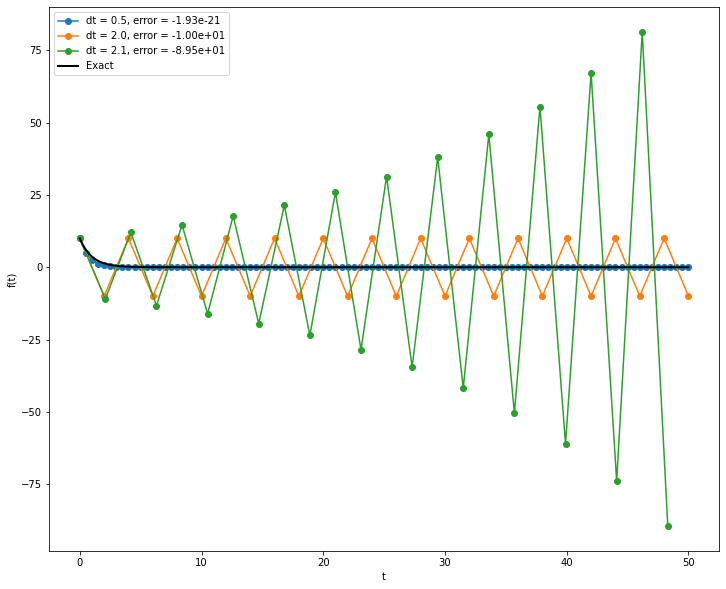

In [62]:
#f' = -f
def euler_step_2(f,dt):
    return f -f*dt

tt = np.linspace(0,50,1000)

fig,ax = plt.subplots(figsize=(12,10))


for dt in [0.5,2,2.1]:
    f0 = 10.
    t = 0.

    #put first value in array
    f = [f0]
    tv = [t]

    while t + dt <= tf:
        f.append(euler_step_2(f[-1],dt))
        t += dt
        tv.append(t)
    
    
    error = f[-1] - 10*np.exp(-50)
    ax.plot(tv,f,label=f'dt = {dt:.1f}, error = {error:.2e}',marker='o')

ax.plot(tt,10*np.exp(-tt),'k-',lw=2,label='Exact')
ax.set_ylabel('f(t)')
ax.set_xlabel('t')
ax.legend()